In [83]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd
from skfuzzy import control as ctrl
%matplotlib inline

In [137]:
df = pd.read_csv("data/custdatabase.csv").drop("Unnamed: 10", axis =1)

In [138]:
df.head()

,index,sex,mstatus,age,children,occupation,education,income,avbal,avtrans
0,1001,M,divorced,44.27,2,legal,postgrad,10245.73,53183.04,4069.67
1,1002,M,married,61.90,1,legal,secondary,1942.57,18100.78,1522.42
2,1003,M,divorced,37.30,1,IT,tertiary,9896.16,24496.82,2723.35
3,1004,F,divorced,25.02,1,legal,postgrad,10136.44,26690.01,4143.04
4,1005,F,divorced,48.37,2,government,secondary,2521.11,13439.81,240.26


In [139]:
df.describe()

,index,age,children,income,avbal,avtrans
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,3000.500000,40.701337,0.915500,5308.354605,22321.316500,1932.156740
std,1154.844867,14.074204,1.052681,3307.480857,11872.049604,1318.799637
min,1001.000000,18.020000,0.000000,356.970000,88.000000,8.940000
25%,2000.750000,28.530000,0.000000,2647.057500,13489.815000,993.750000
50%,3000.500000,39.685000,1.000000,4669.165000,20276.015000,1583.885000
75%,4000.250000,48.035000,2.000000,7208.450000,29826.920000,2500.380000
max,5000.000000,89.820000,4.000000,19955.570000,88682.430000,8789.100000


#### Convert categorical to numerical

In [140]:
sex_map = {"M": 0, "F": 1}
mstatus_map = {"single":0, "married":1, "widowed":2, "divorced":3}
occupation_map = {'legal':0, 'IT':1, 'government':2, 'manuf':3, 'retired':4, 
                  'finance':5,'construct':6, 'education':7, 'medicine':8}
education_map = {'postgrad':3, 'secondary':0, 'tertiary':1, 'professional':2}
df["sex"] = df["sex"].map(sex_map)
df["mstatus"] = df["mstatus"].map(mstatus_map)
df["occupation"] = df["occupation"].map(occupation_map)
df["education"] = df["education"].map(education_map)

#### Membership function for Sex

c:\users\siddp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


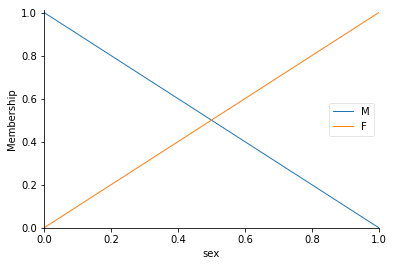

In [167]:
# F =1, M = 0
x = np.arange(df["sex"].min(), df["sex"].max() + 1, 1)
sex = ctrl.Antecedent(x, "sex")
sex["M"] = np.array([1, 0])
sex["F"] = np.array([0, 1])
sex.view()

#### Membership function for mstatus

c:\users\siddp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


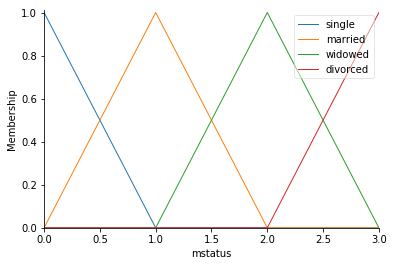

In [142]:
# assuming "single":0, "married":1, "widowed":2, "divorced":3
x = np.arange(df["mstatus"].min(), df["mstatus"].max()+1, 1)
mstatus = ctrl.Antecedent(x, "mstatus")
mstatus["single"] = np.array([1, 0, 0, 0])
mstatus["married"] = np.array([0, 1, 0, 0])
mstatus["widowed"] = np.array([0, 0, 1, 0])
mstatus["divorced"] = np.array([0, 0, 0, 1])
mstatus.view()

#### Membership function for age

c:\users\siddp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


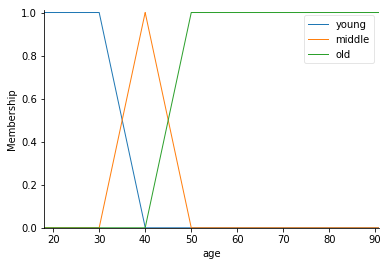

In [143]:
x = np.arange(df["age"].min(), df["age"].max()+1, 0.01)
age = ctrl.Antecedent(x, "age")
age["young"] = fuzz.membership.trapmf(age.universe, [0, 0, 30, 40])
age["middle"] = fuzz.membership.trimf(age.universe, [30, 40, 50])
age["old"] = fuzz.membership.trapmf(age.universe, [40, 50, max(x), max(x)])
age.view()

#### Membership function for children

c:\users\siddp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


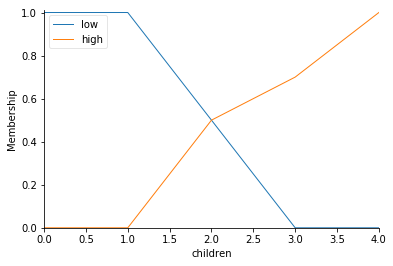

In [150]:
x = np.arange(df["children"].min(), df["children"].max()+1, 1)
children = ctrl.Antecedent(x, "children")
children["low"] = np.array([1, 1, 0.5, 0, 0])
children["high"] = np.array([0, 0, 0.5, 0.7, 1])
children.view()

#### Membership function for occupation

c:\users\siddp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 432x288 with 0 Axes>

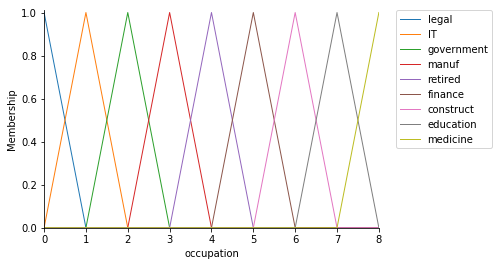

In [152]:
x = np.arange(df["occupation"].min(), df["occupation"].max()+1, 1)
occupation = ctrl.Antecedent(x, "occupation")
occupation["legal"] = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0])
occupation["IT"] = np.array([0, 1, 0, 0, 0, 0, 0, 0, 0])
occupation["government"] = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0])
occupation["manuf"] = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0])
occupation["retired"] = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0])
occupation["finance"] = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0])
occupation["construct"] = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0])
occupation["education"] = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0])
occupation["medicine"] = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1])
plt.figure()
occupation.view()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#### Membership function for education

c:\users\siddp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


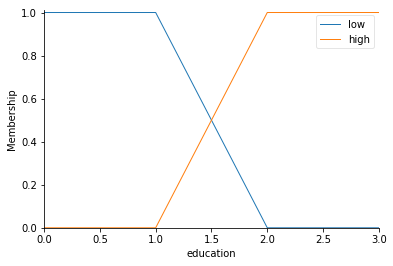

In [153]:
x = np.arange(df["education"].min(), df["education"].max()+1, 1)
education = ctrl.Antecedent(x, "education")
education["low"] = np.array([1, 1, 0, 0])
education["high"] = np.array([0, 0, 1, 1])
education.view()

#### Membership function for income

c:\users\siddp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


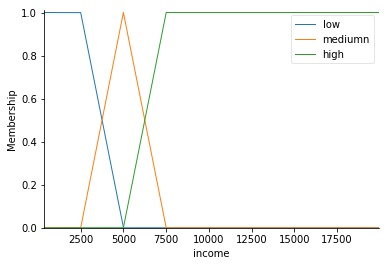

In [154]:
x = np.arange(df["income"].min(), df["income"].max()+1, 0.01)
income = ctrl.Antecedent(x, "income")
income["low"] = fuzz.membership.trapmf(income.universe, [0, 0, 2500, 5000])
income["mediumn"] = fuzz.membership.trimf(income.universe, [2500, 5000, 7500])
income["high"] = fuzz.membership.trapmf(income.universe, [5000, 7500, max(x), max(x)])
income.view()

#### Membership function for avbal

c:\users\siddp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


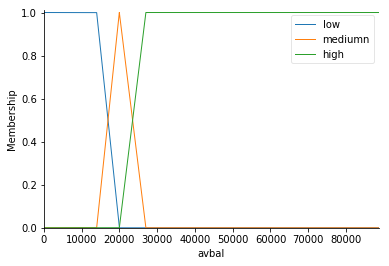

In [92]:
x = np.arange(df["avbal"].min(), df["avbal"].max()+1, 0.01)
avbal = ctrl.Antecedent(x, "avbal")
avbal["low"] = fuzz.membership.trapmf(avbal.universe, [0, 0, 14000, 20000])
avbal["mediumn"] = fuzz.membership.trimf(avbal.universe, [14000, 20000, 27000])
avbal["high"] = fuzz.membership.trapmf(avbal.universe, [20000, 27000, max(x), max(x)])
avbal.view()

#### Membership function for avtrans

c:\users\siddp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


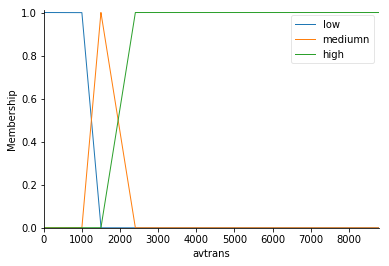

In [99]:
x = np.arange(df["avtrans"].min(), df["avtrans"].max()+1, 0.01)
avtrans = ctrl.Antecedent(x, "avtrans")
avtrans["low"] = fuzz.membership.trapmf(avtrans.universe, [0, 0, 1000, 1500])
avtrans["mediumn"] = fuzz.membership.trimf(avtrans.universe, [1000, 1500, 2400])
avtrans["high"] = fuzz.membership.trapmf(avtrans.universe, [1500, 2400, max(x), max(x)])
avtrans.view()

#### Membership function for CIP

c:\users\siddp\appdata\local\programs\python\python36\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


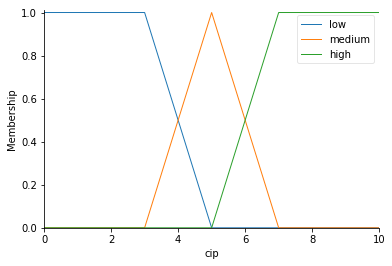

In [101]:
x = np.arange(0, 10, 0.01)
cip = ctrl.Antecedent(x, "cip")
cip["low"] = fuzz.membership.trapmf(cip.universe, [0, 0, 3, 5])
cip["medium"] = fuzz.membership.trimf(cip.universe, [3, 5, 7])
cip["high"] = fuzz.membership.trapmf(cip.universe, [5, 7, max(x), max(x)])
cip.view()

In [157]:
row = df.loc[0]

In [166]:
row["sex"]

0.0